In [18]:
import os
import cv2
import mediapipe as mp
import cv2
import mediapipe as mp

from google.protobuf.json_format import MessageToJson
import json

import pandas as pd
import numpy as np
import re
#from test_dynamic import landmark_to_dist_emb

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [19]:
def distance_between(p1_loc, p2_loc):
    jsonObj = MessageToJson(results.multi_hand_landmarks[0])
    lmk = json.loads(jsonObj)['landmark']
    p1 = pd.DataFrame(lmk).to_numpy()[p1_loc]
    p2 = pd.DataFrame(lmk).to_numpy()[p2_loc]
    squared_dist = np.sum((p1-p2)**2, axis=0)
    return np.sqrt(squared_dist)

def landmark_to_dist_emb(results):
    jsonObj = MessageToJson(results.multi_hand_landmarks[0])
    lmk = json.loads(jsonObj)['landmark']
    emb = np.array([
        #thumb to finger tip
        distance_between(4,8),
        distance_between(4,12),
        distance_between(4,16),
        distance_between(4,20),
        #wrist to finger tip
        distance_between(4,0),
        distance_between(8,0),
        distance_between(12,0),
        distance_between(16,0),
        distance_between(20,0),
        #tip to tip (specific to this application)
        distance_between(8,12),
        distance_between(12,16),
        #within finger joint (detect bending)
        distance_between(1,4),
        distance_between(8,5),
        distance_between(12,9),
        distance_between(16,13),
        distance_between(20,17),
        #distance from each tip to thumb joint
        distance_between(2,8),
        distance_between(2,12),
        distance_between(2,16),
        distance_between(2,20) ])
    #use np normalize, as min_max may create confusion that the closest fingers has 0 distance
    emb_norm = emb / np.linalg.norm(emb)
    return emb_norm


# Lista di file video nella cartella specificata
path_training_videos = 'trainingv3/'

import os
listaFile = []
listaDir = []
for path, subdirs, files in os.walk(path_training_videos):
    for name in files:
        print(os.path.join(path, name))
        listaFile.append(os.path.join(path, name))
    for name in subdirs:
        listaDir.append(name)

# listaClassi = [x for x in range(1,len(listaDir))]
# if len(listaClassi) < 1:
#     exit(-1)
    
#Ex. listaDir:      gesture1, gesture2, gesture3
#    listaClassi:   1, 2, 3

#salvare i gesti delle cartelle


#arr = os.listdir(path_training_videos)
video_class_all = []
landmark_npy_all = []

# Inizializza il rilevatore di mani di MediaPipe
handnn = mp_hands.Hands(max_num_hands=1, min_detection_confidence=0.6, min_tracking_confidence=0.6)

# Itera su ogni video nella cartella
for idx, eachVideo in enumerate(listaFile):
    landmark_npy_single = []  # Array per salvare i landmarks del singolo video
    video = eachVideo  # Percorso completo del video
    print(f"Analisi del video: {video}")
    # Apre il video usando OpenCV
    cap = cv2.VideoCapture(video)

    # Estrae la classe del video (assumendo che la classe sia nel nome del file, separata da '_')
    # estrare la classe del video, basandosi sulla sua cartella
    nome_cartella = re.search(r'[^/\\]+[/\\]([^/\\]+)', video).group(1)
    gestoCounter = 1
    for gesto in listaDir:
        if nome_cartella == gesto:
            break
        gestoCounter += 1
            
    
    
    video_class_all.append(int(gestoCounter))

    # Leggi i frame del video finché è aperto
    while cap.isOpened():
        success, image = cap.read()  # Legge un frame dal video
        if not success:
            break  # Esce dal ciclo se non ci sono più frame

        # Pre-elaborazione dell'immagine: flip e conversione da BGR a RGB
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
        image.flags.writeable = False  # Blocca la scrittura sull'immagine per efficienza

        # Esegue il rilevamento delle mani
        results = handnn.process(image)

        # Rende di nuovo l'immagine scrivibile
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Riconversione da RGB a BGR

        # Se rileva una mano nei risultati, salva i landmarks
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                landmark_npy_single.append(
                    landmark_to_dist_emb(results))  # Funzione ipotetica per convertire landmarks in array

    # Salva i landmarks di tutti i frame di questo video
    landmark_npy_all.append(landmark_npy_single)


    # Rilascia il video
    cap.release()

# Stampa il messaggio finale
print(f"Finished for total {len(listaFile)} videos. Completed.")
print(landmark_npy_all)


trainingv3/fist\WIN_20241015_21_59_27_Pro.mp4
trainingv3/fist\WIN_20241015_22_09_36_Pro.mp4
trainingv3/grabbing\WIN_20241015_22_13_48_Pro.mp4
trainingv3/grabbing\WIN_20241015_22_13_59_Pro.mp4
trainingv3/middlefinger\WIN_20241015_22_05_55_Pro.mp4
trainingv3/middlefinger\WIN_20241015_22_08_24_Pro.mp4
trainingv3/openhand\WIN_20241015_21_59_40_Pro.mp4
trainingv3/openhand\WIN_20241015_22_09_22_Pro.mp4
Analisi del video: trainingv3/fist\WIN_20241015_21_59_27_Pro.mp4


C:\Users\conca\Documents\progetti\progettoUIT\ispirazione8_pyglet\pythonProject8\venv\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Analisi del video: trainingv3/fist\WIN_20241015_22_09_36_Pro.mp4
Analisi del video: trainingv3/grabbing\WIN_20241015_22_13_48_Pro.mp4
Analisi del video: trainingv3/grabbing\WIN_20241015_22_13_59_Pro.mp4
Analisi del video: trainingv3/middlefinger\WIN_20241015_22_05_55_Pro.mp4
Analisi del video: trainingv3/middlefinger\WIN_20241015_22_08_24_Pro.mp4
Analisi del video: trainingv3/openhand\WIN_20241015_21_59_40_Pro.mp4
Analisi del video: trainingv3/openhand\WIN_20241015_22_09_22_Pro.mp4
Finished for total 8 videos. Completed.
[[array([0.13696634, 0.1876298 , 0.2286529 , 0.24701546, 0.46375784,
       0.33234784, 0.27974553, 0.25157744, 0.2599081 , 0.07823753,
       0.05299322, 0.39364774, 0.0891333 , 0.08440673, 0.1000631 ,
       0.09286527, 0.11847742, 0.13011133, 0.16389123, 0.2066135 ]), array([0.14498174, 0.18062531, 0.21747589, 0.23706357, 0.46124149,
       0.32393018, 0.28462006, 0.26198106, 0.27356936, 0.06920346,
       0.05444492, 0.39605901, 0.07782152, 0.08161528, 0.09646777,


In [20]:
classes = len(set(video_class_all))
feature_len = 20
max_len = 50
print(len(video_class_all))
print(video_class_all)

8
[1, 1, 2, 2, 3, 3, 4, 4]


In [21]:
from keras.preprocessing.sequence import pad_sequences
import math

def skip_frame(landmark_npy_all, frame=50):
    new_lmk_array = []
    for each in landmark_npy_all:
        if len(each) <= frame:
            # Se la lunghezza è minore o uguale al numero di frame, non serve saltare
            new_lmk_array.append(each)
        else:
            # Salta frame prendendo ogni N-esimo elemento (arrotondato per eccesso)
            to_round = math.ceil(len(each) / frame)
            new_lmk_array.append(each[::to_round])
    return new_lmk_array

# Applica lo skip frame alla lista landmark_npy_all
new_lmk_array = skip_frame(landmark_npy_all)

# Padding della sequenza per garantire una lunghezza uniforme
train_x = pad_sequences(new_lmk_array, padding='post', maxlen=max_len, dtype='float32')


In [22]:
from tensorflow.keras.utils import to_categorical  # Per la one-hot encoding
from sklearn.model_selection import train_test_split  # Per la divisione del dataset

#hot encode output
print(video_class_all)
train_y = to_categorical([i-1 for i in video_class_all])
print('Training y with shape of: ', train_y.shape)
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

print('Training X with shape of: ', X_train.shape)
print('Training y with shape of: ', y_train.shape)
print('Testing x with shape of: ', X_test.shape)
print('Testing y with shape of: ', y_test.shape)

[1, 1, 2, 2, 3, 3, 4, 4]
Training y with shape of:  (8, 4)
Training X with shape of:  (6, 50, 20)
Training y with shape of:  (6, 4)
Testing x with shape of:  (2, 50, 20)
Testing y with shape of:  (2, 4)


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Definisci il modello sequenziale
model = Sequential()

# Aggiungi i livelli LSTM e altri strati
model.add(LSTM(256, return_sequences=True, input_shape=(max_len, feature_len)))
model.add(Dropout(0.25))

model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.25))

model.add(LSTM(128, return_sequences=False))

# Aggiungi il livello denso e la normalizzazione batch
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Ultimo livello per la classificazione
model.add(Dense(classes, activation='softmax'))

# Compila il modello
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Mostra il sommario del modello
model.summary()

# Definizione del programma di apprendimento (learning rate schedule)
def lrSchedule(epoch):
    lr = 0.001
    if epoch > 200:
        lr *= 0.0005
    elif epoch > 120:
        lr *= 0.005
    elif epoch > 50:
        lr *= 0.01
    elif epoch > 30:
        lr *= 0.1
        
    print('Learning rate: ', lr)
    return lr

# Inizializzazione del LearningRateScheduler
LRScheduler = LearningRateScheduler(lrSchedule)

# Lista dei callbacks
callbacks_list = [LRScheduler]


C:\Users\conca\Documents\progetti\progettoUIT\ispirazione8_pyglet\pythonProject8\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 256)        │       283,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,852 (3.87 MB)

 Trainable params: 1,014,724 (3.87 MB)

 Non-trainable params: 128 (512.00 B)

In [24]:
# Definizione di parametri per l'addestramento
verbose = 1         # Livello di dettaglio durante l'addestramento (1 = barra di progresso)
epochs = 300        # Numero di epoche
batch_size = 8      # Dimensione del batch

# Addestramento del modello
model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),  # Dati di validazione per valutare il modello
    epochs=epochs,                     # Numero totale di epoche
    batch_size=batch_size,             # Dimensione del batch
    verbose=verbose,                   # Verbosità dell'output
    shuffle=True,                      # Mescola i dati prima di ogni epoca
    callbacks=callbacks_list           # Lista dei callbacks, tra cui il LearningRateScheduler
)


Learning rate:  0.001
Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1667 - loss: 1.3334 - val_accuracy: 0.0000e+00 - val_loss: 1.4214 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8333 - loss: 0.9080 - val_accuracy: 0.5000 - val_loss: 1.4390 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8333 - loss: 0.6103 - val_accuracy: 0.0000e+00 - val_loss: 1.4592 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 1.0000 - loss: 0.4118 - val_accuracy: 0.0000e+00 - val_loss: 1.4981 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 1.0000 - loss: 0.3479 - val_accuracy: 0.0000e+00 - val_loss: 1.5659 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 1.0000 - loss: 0.2305 - val_accuracy: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


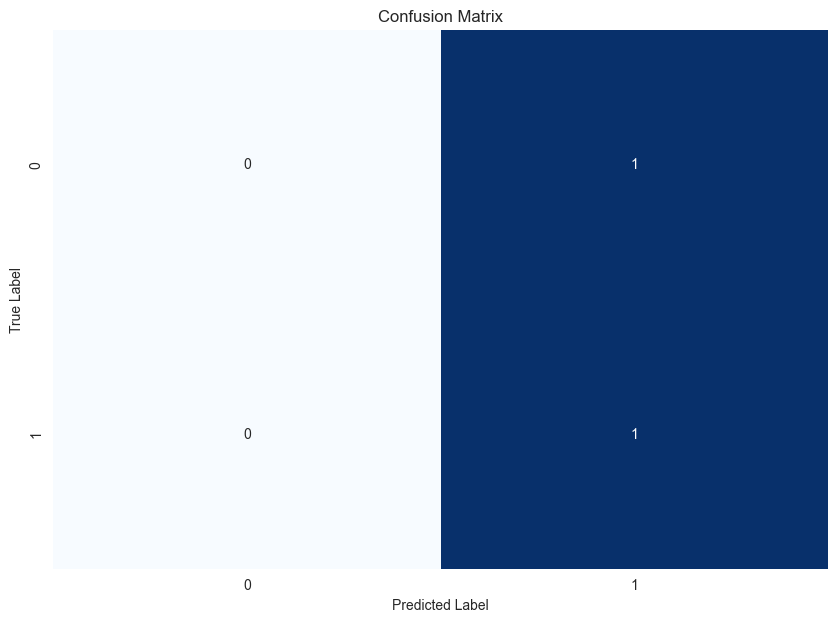

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predici i valori di test
y_pred = model.predict(X_test)

# Ottieni le classi con argmax (poiché y_pred e y_test sono probabilità one-hot)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Genera la matrice di confusione
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot della matrice di confusione
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [26]:
#save model
model.save('modelloV1.keras')